## 1.a Handling Missing Values  
Goal: Identify and handle missing values in the dataset to ensure data completeness and quality.

In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv("../data/loan.csv")
print("Shape:", df.shape)
display(df.head())
df.info()

Shape: (614, 12)


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [4]:
missing_before = df.isnull().sum()
missing_before = missing_before[missing_before > 0].sort_values(ascending=False)
missing_df = missing_before.to_frame(name='missing_count')
missing_df['missing_percent'] = 100 * missing_df['missing_count'] / len(df)
missing_df = missing_df.reset_index().rename(columns={'index': 'column'}).set_index('column')
if missing_df.empty:
    print("No missing values found in the dataset (before imputation).")
else:
    display(missing_df)

,missing_count,missing_percent
column,,
Credit_History,50,8.143322
Self_Employed,32,5.211726
LoanAmount,22,3.583062
Dependents,15,2.442997
Loan_Amount_Term,14,2.280130
Gender,13,2.117264
Married,3,0.488599


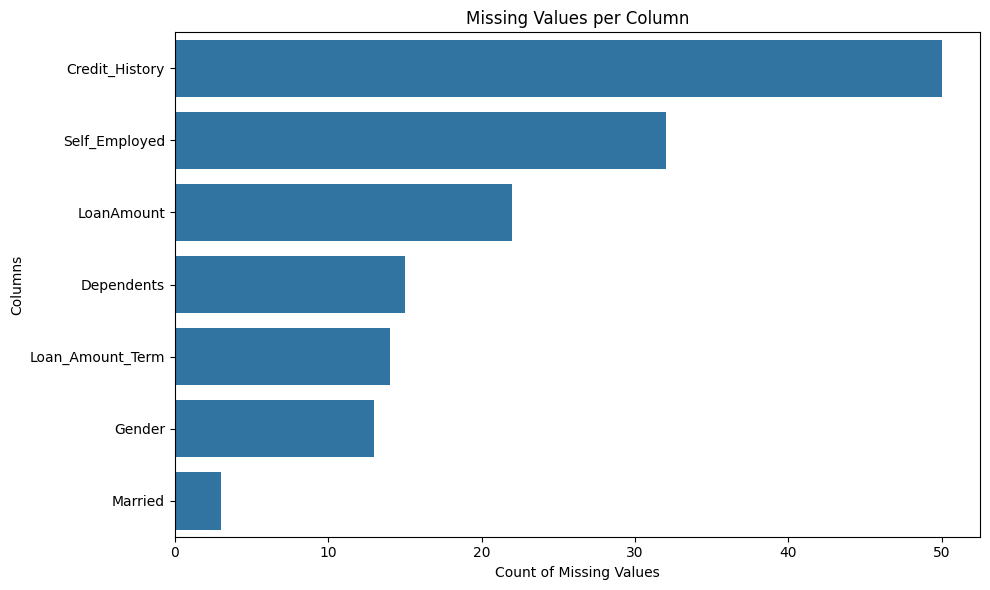

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns


missing_series = df.isnull().sum()
missing_series = missing_series[missing_series > 0].sort_values(ascending=False)

if missing_series.empty:
    print("No missing values to plot.")
else:
    plt.figure(figsize=(10, 6))
    sns.barplot(x=missing_series.values, y=missing_series.index)
    plt.title("Missing Values per Column")
    plt.xlabel("Count of Missing Values")
    plt.ylabel("Columns")
    plt.tight_layout()
    plt.show()

In [6]:
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].median())


cat_cols = df.select_dtypes(include=['object']).columns
for col in cat_cols:
    if df[col].isnull().any():
        df[col] = df[col].fillna(df[col].mode()[0])


print("Missing values after imputation:")
display(df.isnull().sum())

Missing values after imputation:


Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [7]:
missing_after = df.isnull().sum()
missing_after = missing_after[missing_after > 0]

if missing_after.empty:
    print("No missing values remain after imputation.")
else:
    display(missing_after.to_frame(name='missing_count_after'))


No missing values remain after imputation.


In [8]:
if not missing_after.empty:
    plt.figure(figsize=(10, 6))
    sns.barplot(x=missing_after.values, y=missing_after.index)
    plt.title("Missing Values per Column (After Imputation)")
    plt.xlabel("Count of Missing Values")
    plt.ylabel("Columns")
    plt.tight_layout()
    plt.show()

### 1.a Handling Missing Values
Identify and handle missing values by using appropriate imputation methods (median for numeric, mode for categorical). Verify that no missing data remains.

## 1.b Encoding Non-Numeric Features
Goal: Convert categorical features into numerical values for machine learning compatibility.

In [9]:
categorical_cols = df.select_dtypes(include=['object']).columns
print("Categorical columns:", categorical_cols.tolist())

Categorical columns: ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']


In [10]:
for col in categorical_cols:
    print(f"{col}: {df[col].unique()}")

Gender: ['Male' 'Female']
Married: ['No' 'Yes']
Dependents: ['0' '1' '2' '3+']
Education: ['Graduate' 'Not Graduate']
Self_Employed: ['No' 'Yes']
Property_Area: ['Urban' 'Rural' 'Semiurban']
Loan_Status: ['Y' 'N']


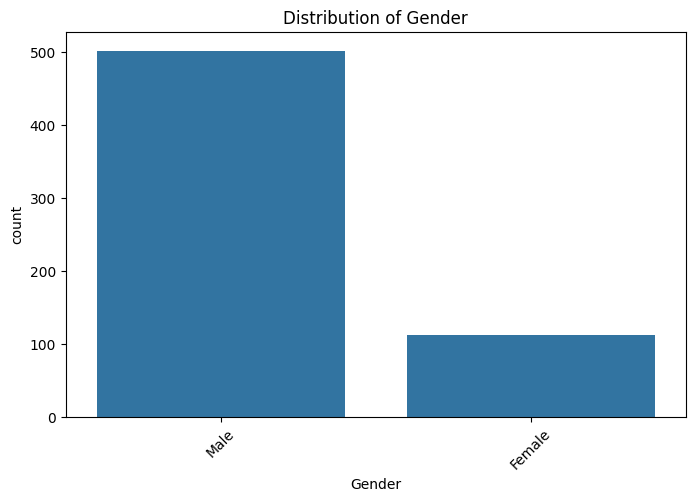

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

first_cat_col = categorical_cols[0]
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x=first_cat_col)
plt.title(f"Distribution of {first_cat_col}")
plt.xticks(rotation=45)
plt.show()

In [12]:
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
df_encoded.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,5849,0.0,128.0,360.0,1.0,True,False,False,False,False,False,False,False,True,True
1,4583,1508.0,128.0,360.0,1.0,True,True,True,False,False,False,False,False,False,False
2,3000,0.0,66.0,360.0,1.0,True,True,False,False,False,False,True,False,True,True
3,2583,2358.0,120.0,360.0,1.0,True,True,False,False,False,True,False,False,True,True
4,6000,0.0,141.0,360.0,1.0,True,False,False,False,False,False,False,False,True,True


In [13]:
print("Shape before encoding:", df.shape)
print("Shape after encoding:", df_encoded.shape)

Shape before encoding: (614, 12)
Shape after encoding: (614, 15)


### 1.b Encoding Categorical Variables
Categorical variables were transformed into numerical format using One-Hot Encoding.  
Shape before encoding: (614, 12)  
Shape after encoding: (614, 15)  
Three new columns were added as a result of encoding categorical features.

### 1.c Data Splitting
Split the dataset into three parts: Training (65%), Validation (20%), and Test (15%) to ensure proper evaluation without data leakage.

In [14]:
X = df.drop('Loan_Status', axis=1)
y = df['Loan_Status']

print("Features shape:", X.shape)
print("Target shape:", y.shape)

Features shape: (614, 11)
Target shape: (614,)


In [15]:
from sklearn.model_selection import train_test_split

X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.35, random_state=42, stratify=y
)

print("Train shape:", X_train.shape)
print("Temp shape:", X_temp.shape)

Train shape: (399, 11)
Temp shape: (215, 11)


In [16]:
val_size = 20 / (20 + 15)

X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=1 - val_size, random_state=42, stratify=y_temp
)

print("Validation shape:", X_val.shape)
print("Test shape:", X_test.shape)

Validation shape: (122, 11)
Test shape: (93, 11)


In [17]:
print("Total records:", len(X_train) + len(X_val) + len(X_test))
print("Matches original dataset size:", len(df) == (len(X_train) + len(X_val) + len(X_test)))

Total records: 614
Matches original dataset size: True


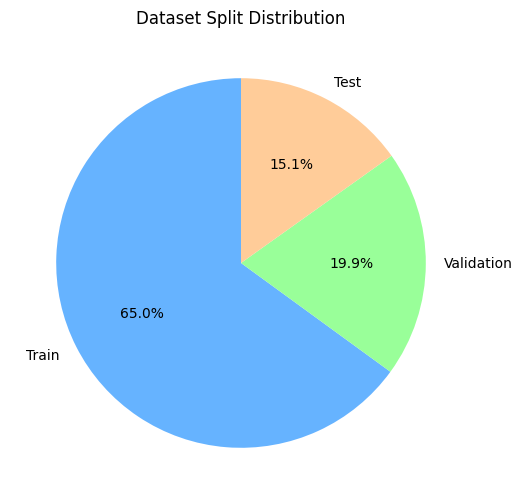

In [19]:
import matplotlib.pyplot as plt

sizes = [len(X_train), len(X_val), len(X_test)]
labels = ['Train', 'Validation', 'Test']
colors = ['#66b3ff', '#99ff99', '#ffcc99']

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Dataset Split Distribution')
plt.show()

C:\Users\mbahr\AppData\Local\Temp\ipykernel_8660\3934218460.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=labels, y=sizes, palette=colors)


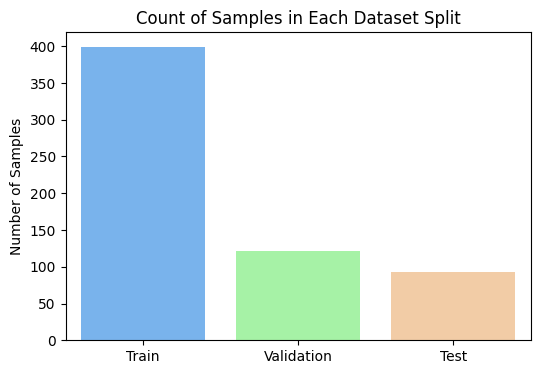

In [20]:
import seaborn as sns

plt.figure(figsize=(6, 4))
sns.barplot(x=labels, y=sizes, palette=colors)
plt.ylabel('Number of Samples')
plt.title('Count of Samples in Each Dataset Split')
plt.show()

Result: Data successfully split into Train, Validation, and Test sets with no loss of records.

## 1.d Normalization of Numerical Data
Goal: Explain normalization, then train models with and without normalization and compare results.

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [22]:
X = df.drop("Loan_Status", axis=1)
y = df["Loan_Status"]


X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.35, random_state=42, stratify=y
)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=15/35, random_state=42, stratify=y_temp
)

print("Train shape:", X_train.shape)
print("Validation shape:", X_val.shape)
print("Test shape:", X_test.shape)

Train shape: (399, 11)
Validation shape: (122, 11)
Test shape: (93, 11)


In [23]:
numeric_cols = X_train.select_dtypes(include=np.number).columns
print("Numeric columns:", numeric_cols.tolist())

Numeric columns: ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']


In [24]:
scaler = StandardScaler()


X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])


X_val[numeric_cols] = scaler.transform(X_val[numeric_cols])
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])

print("Normalization applied successfully.")

Normalization applied successfully.


In [25]:
X_train[numeric_cols].describe().round(2)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,399.00,399.00,399.00,399.00,399.00
mean,-0.00,-0.00,-0.00,0.00,0.00
std,1.00,1.00,1.00,1.00,1.00
min,-0.80,-0.57,-1.56,-4.74,-2.61
25%,-0.40,-0.57,-0.52,0.31,0.38
50%,-0.25,-0.17,-0.23,0.31,0.38
75%,0.04,0.22,0.23,0.31,0.38
max,11.07,14.02,6.17,2.18,0.38


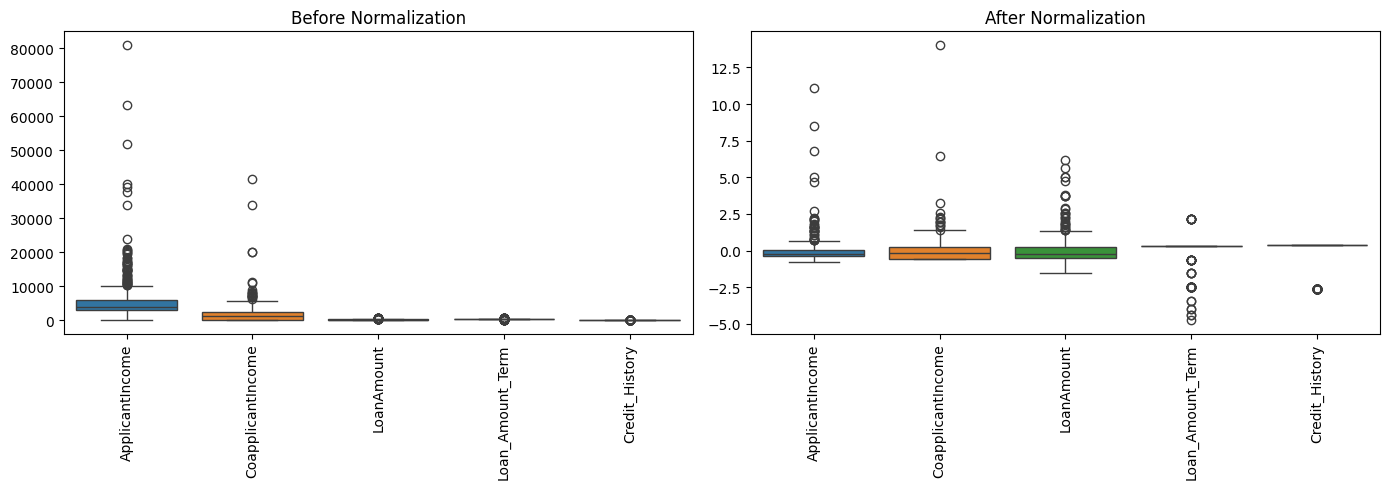

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns


df_original = pd.read_csv("../data/loan.csv")
X_original = df_original.drop("Loan_Status", axis=1)
numeric_original = X_original[numeric_cols]


fig, axes = plt.subplots(1, 2, figsize=(14, 5))


sns.boxplot(data=numeric_original, ax=axes[0])
axes[0].set_title("Before Normalization")
axes[0].tick_params(axis='x', rotation=90)


sns.boxplot(data=X_train[numeric_cols], ax=axes[1])
axes[1].set_title("After Normalization")
axes[1].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

In [27]:
import joblib
import os


save_dir = "./notebook"
os.makedirs(save_dir, exist_ok=True)


joblib.dump(X_train, os.path.join(save_dir, "X_train.pkl"))
joblib.dump(X_val,   os.path.join(save_dir, "X_val.pkl"))
joblib.dump(X_test,  os.path.join(save_dir, "X_test.pkl"))

joblib.dump(y_train, os.path.join(save_dir, "y_train.pkl"))
joblib.dump(y_val,   os.path.join(save_dir, "y_val.pkl"))
joblib.dump(y_test,  os.path.join(save_dir, "y_test.pkl"))

print("✅ Data splits saved in 'notebook' folder.")


✅ Data splits saved in 'notebook' folder.


Result: Numeric features successfully normalized; comparison plots show scale adjustment.

### Summary of Section 1: Data Preprocessing
In this section, the dataset was preprocessed through four main steps:  
- 1.a Missing values were handled using imputation techniques.  
- 1.b Categorical variables were encoded into numeric format.  
- 1.c Data was split into training, validation, and test sets (15%-20%-65%).  
- 1.d Numeric features were normalized to improve model performance.  

All steps were completed successfully, ensuring the dataset is clean, numeric, and ready for model training and evaluation.